In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [25]:
# Read monthly trade data
df = pd.read_csv('../data/processed/monthly_TradeData.csv')

count    5.455370e+05
mean     1.291659e+07
std      1.890317e+08
min      0.000000e+00
25%      3.282422e+03
50%      3.521784e+04
75%      4.920313e+05
max      1.817995e+10
Name: PrimaryValue, dtype: float64


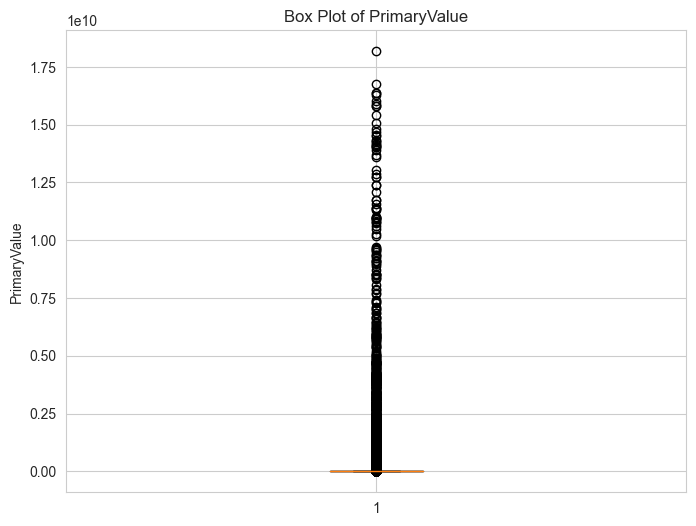

Outliers detected using Z-score method:
        Period ReporterISO          ReporterDesc PartnerISO  \
5573    201501         HKG  China, Hong Kong SAR        CHN   
5948    201501         KOR         Rep. of Korea        CHN   
5954    201501         KOR         Rep. of Korea        HKG   
6697    201501         SGP             Singapore        CHN   
6709    201501         SGP             Singapore        HKG   
...        ...         ...                   ...        ...   
544634  201812         SGP             Singapore        CHN   
544648  201812         SGP             Singapore        HKG   
544663  201812         SGP             Singapore        MYS   
544666  201812         SGP             Singapore        TWN   
545437  201812         USA                   USA        CHN   

                 PartnerDesc  PrimaryValue  
5573                   China  6.082870e+09  
5948                   China  2.053775e+09  
5954    China, Hong Kong SAR  7.771237e+08  
6697                   

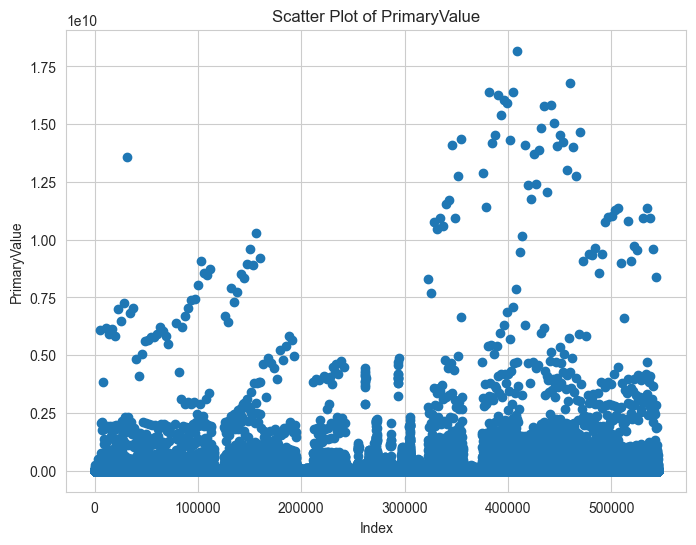

In [26]:
# Step 1: Summary Statistics
summary_stats = df['PrimaryValue'].describe()
print(summary_stats)

# Step 2: Box Plot
plt.figure(figsize=(8, 6))
plt.boxplot(df['PrimaryValue'])
plt.title('Box Plot of PrimaryValue')
plt.ylabel('PrimaryValue')
plt.show()

# Step 3: Z-Score
z_scores = (df['PrimaryValue'] - df['PrimaryValue'].mean()) / df['PrimaryValue'].std()
outliers_zscore = df[abs(z_scores) > 3]
print("Outliers detected using Z-score method:")
print(outliers_zscore)

# Step 4: Interquartile Range (IQR)
Q1 = df['PrimaryValue'].quantile(0.25)
Q3 = df['PrimaryValue'].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = df[(df['PrimaryValue'] < (Q1 - 1.5 * IQR)) | (df['PrimaryValue'] > (Q3 + 1.5 * IQR))]
print("Outliers detected using IQR method:")
print(outliers_iqr)

# Step 5: Visualization
plt.figure(figsize=(8, 6))
plt.scatter(df.index, df['PrimaryValue'])
plt.title('Scatter Plot of PrimaryValue')
plt.xlabel('Index')
plt.ylabel('PrimaryValue')
plt.show()

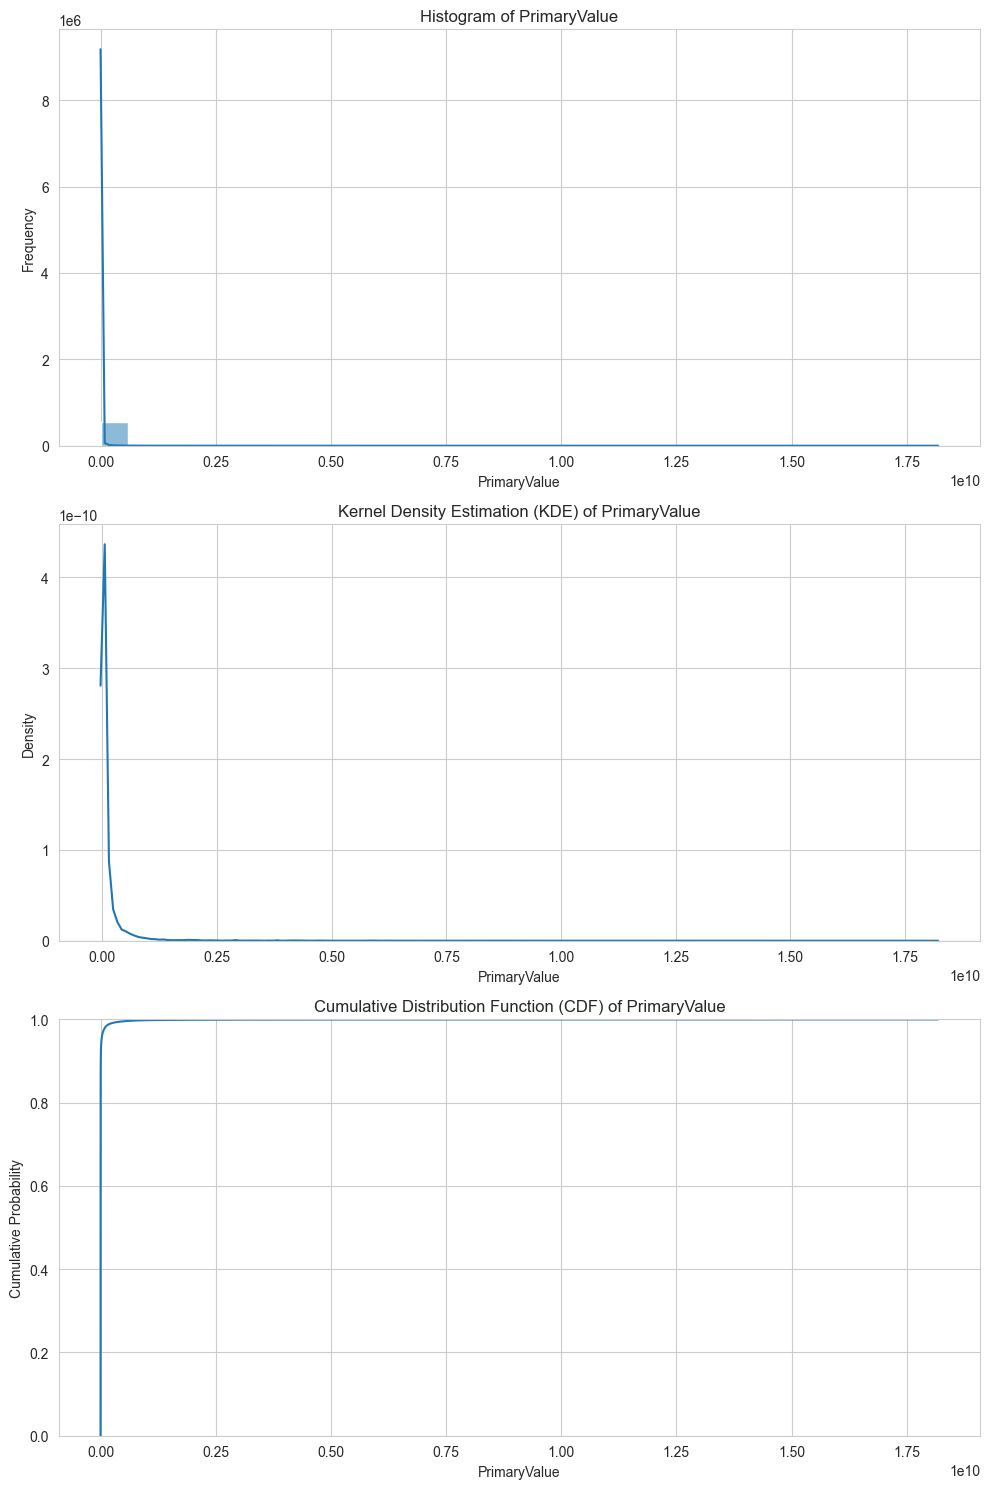

In [27]:
# Set up the figure and axes
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Plot a histogram of the PrimaryValue data
sns.histplot(data=df, x='PrimaryValue', bins=30, kde=True, ax=axes[0])
axes[0].set_title('Histogram of PrimaryValue')
axes[0].set_xlabel('PrimaryValue')
axes[0].set_ylabel('Frequency')

# Plot a kernel density estimation (KDE) plot
sns.kdeplot(data=df, x='PrimaryValue', ax=axes[1])
axes[1].set_title('Kernel Density Estimation (KDE) of PrimaryValue')
axes[1].set_xlabel('PrimaryValue')
axes[1].set_ylabel('Density')

# Plot a cumulative distribution function (CDF) plot
sns.ecdfplot(data=df, x='PrimaryValue', ax=axes[2])
axes[2].set_title('Cumulative Distribution Function (CDF) of PrimaryValue')
axes[2].set_xlabel('PrimaryValue')
axes[2].set_ylabel('Cumulative Probability')

plt.tight_layout()
plt.show()

### Remove 25% extreme small values

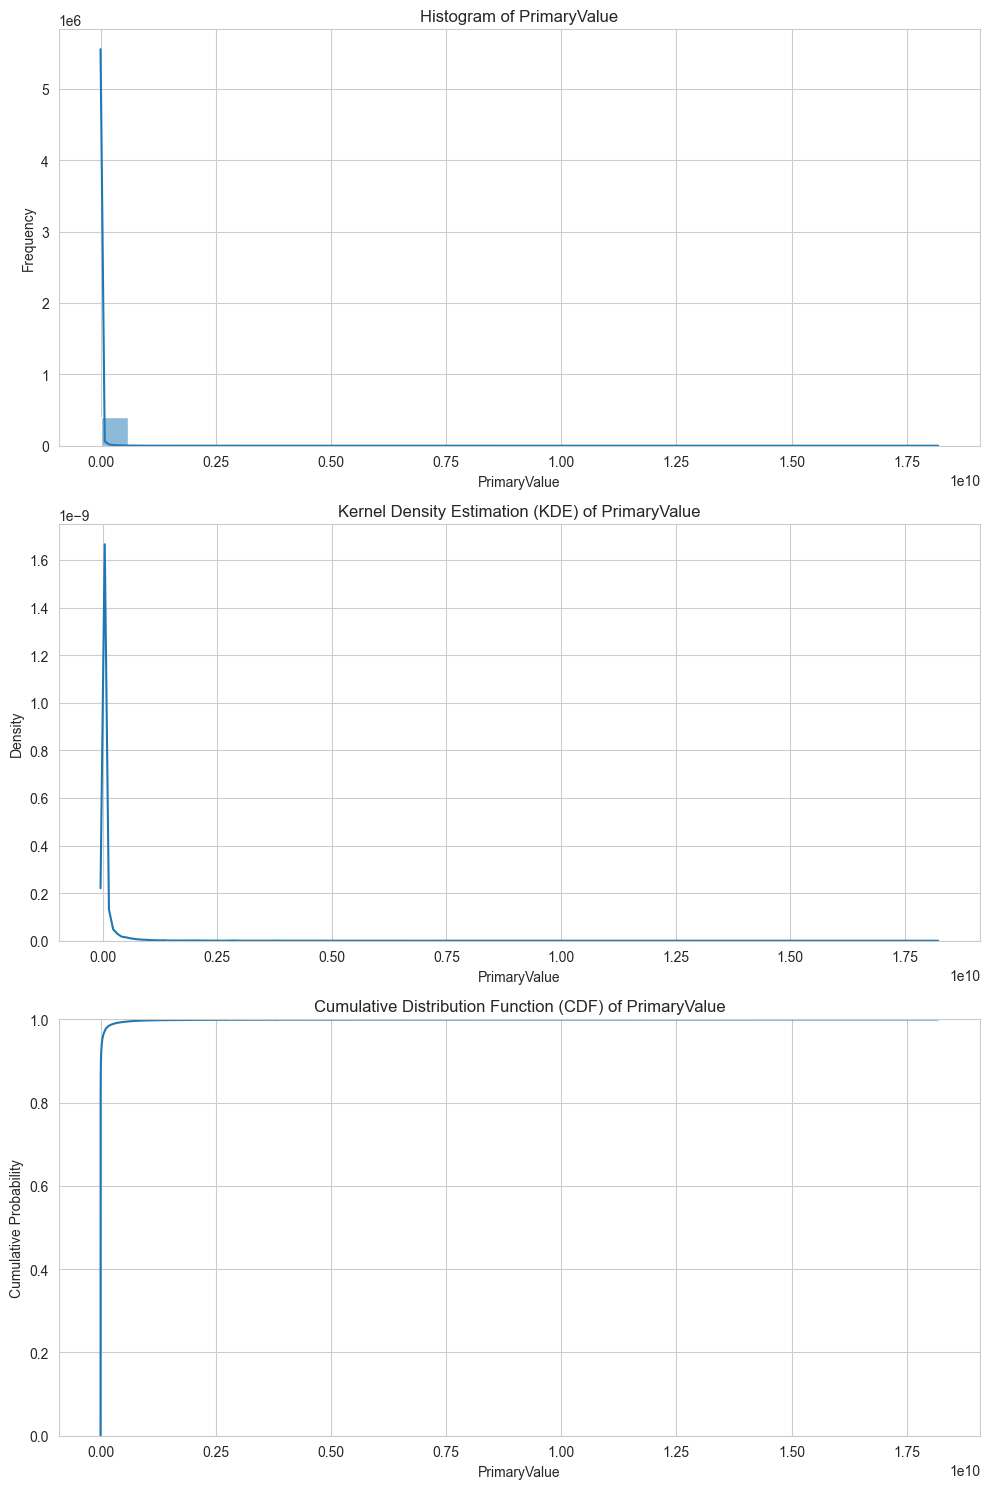

In [28]:
import matplotlib.pyplot as plt

# Calculate the 25th percentile
threshold_value = df['PrimaryValue'].quantile(0.25)

# Filter out values below the threshold
filtered_data = df[df['PrimaryValue'] > threshold_value]

# Sort the filtered data by PrimaryValue
sorted_data = filtered_data.sort_values(by='PrimaryValue')

# Set up the figure and axes
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Plot a histogram of the PrimaryValue data
sns.histplot(data=sorted_data, x='PrimaryValue', bins=30, kde=True, ax=axes[0])
axes[0].set_title('Histogram of PrimaryValue')
axes[0].set_xlabel('PrimaryValue')
axes[0].set_ylabel('Frequency')

# Plot a kernel density estimation (KDE) plot
sns.kdeplot(data=sorted_data, x='PrimaryValue', ax=axes[1])
axes[1].set_title('Kernel Density Estimation (KDE) of PrimaryValue')
axes[1].set_xlabel('PrimaryValue')
axes[1].set_ylabel('Density')

# Plot a cumulative distribution function (CDF) plot
sns.ecdfplot(data=sorted_data, x='PrimaryValue', ax=axes[2])
axes[2].set_title('Cumulative Distribution Function (CDF) of PrimaryValue')
axes[2].set_xlabel('PrimaryValue')
axes[2].set_ylabel('Cumulative Probability')

plt.tight_layout()
plt.show()


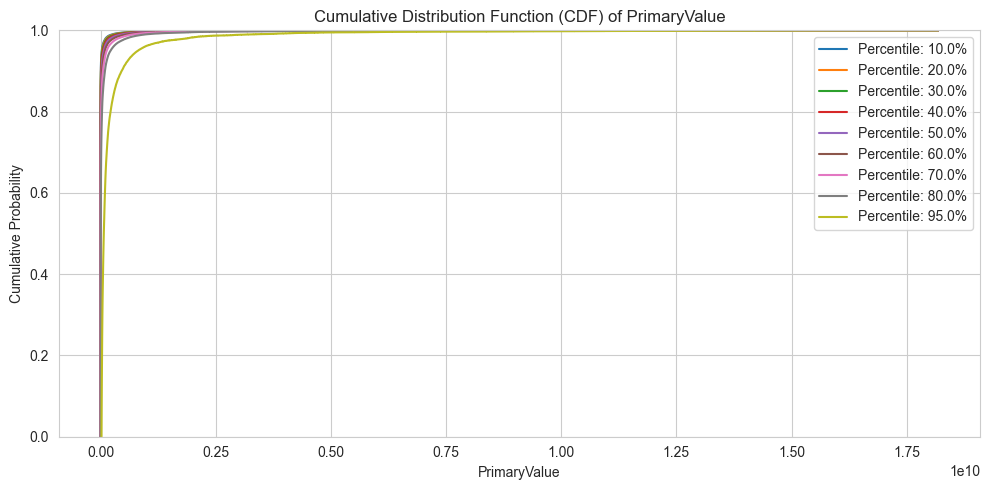

In [29]:
import seaborn as sns

# Calculate the percentiles
percentiles = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.95]
filtered_data = []

# Filter and sort data for each percentile
for percentile in percentiles:
    threshold_value = df['PrimaryValue'].quantile(percentile)
    filtered_data.append(df[df['PrimaryValue'] > threshold_value])

# Set up the figure and axes
plt.figure(figsize=(10, 5))

# Plot CDF for each percentile
for i, percentile in enumerate(percentiles):
    sns.ecdfplot(data=filtered_data[i], x='PrimaryValue', label=f'Percentile: {percentile * 100}%')

plt.title('Cumulative Distribution Function (CDF) of PrimaryValue')
plt.xlabel('PrimaryValue')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.tight_layout()
plt.show()


### Baseline

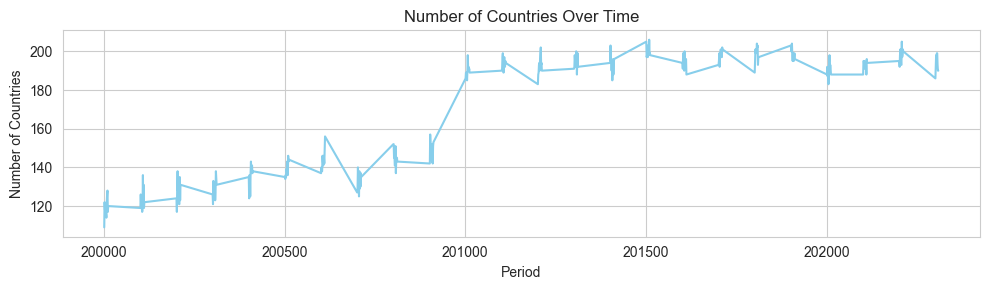

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with columns 'ReporterDesc', 'PartnerDesc', 'Period', and 'PrimaryValue'

# Concatenate unique country names from both 'ReporterDesc' and 'PartnerDesc' columns
unique_countries_0 = pd.concat([df['ReporterDesc'], df['PartnerDesc']]).unique()

# Group by 'Period' and count the unique countries for each period
country_counts_by_period_0 = df.groupby('Period')[['ReporterDesc', 'PartnerDesc']].apply(lambda x: len(set(x['ReporterDesc']).union(set(x['PartnerDesc']))))

plt.figure(figsize=(10, 3))
# Plotting
country_counts_by_period_0.plot(color='skyblue', linestyle='-')
plt.title('Number of Countries Over Time')
plt.xlabel('Period')
plt.ylabel('Number of Countries')
plt.tight_layout()
plt.show()


### Take 60% as an example

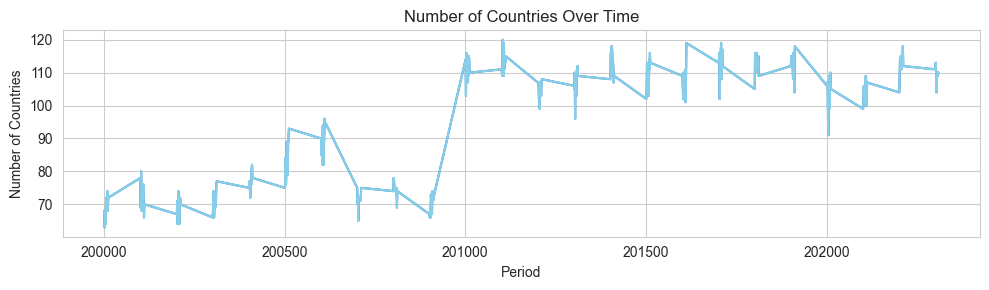

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with columns 'ReporterDesc', 'PartnerDesc', 'Period', and 'PrimaryValue'

# Define the range of percentile thresholds
percentile_threshold = 0.6

plt.figure(figsize=(10, 3))

value_threshold = df['PrimaryValue'].quantile(percentile_threshold)

# Filter out rows with 'PrimaryValue' below the threshold
df_filtered = df[df['PrimaryValue'] >= value_threshold]

# Concatenate unique country names from both 'ReporterDesc' and 'PartnerDesc' columns
unique_countries_demo = pd.concat([df_filtered['ReporterDesc'], df_filtered['PartnerDesc']]).unique()

# Group by 'Period' and count the unique countries for each period
country_counts_by_period_demo = df_filtered.groupby('Period')[['ReporterDesc', 'PartnerDesc']].apply(
    lambda x: len(set(x['ReporterDesc']).union(set(x['PartnerDesc']))))

# Plotting
country_counts_by_period_demo.plot(label=f'{percentile_threshold * 100:.1f}th Percentile')

# Plotting
country_counts_by_period_demo.plot(color='skyblue', linestyle='-')
plt.title('Number of Countries Over Time')
plt.xlabel('Period')
plt.ylabel('Number of Countries')
plt.tight_layout()
plt.show()


### Remove small values by percentile

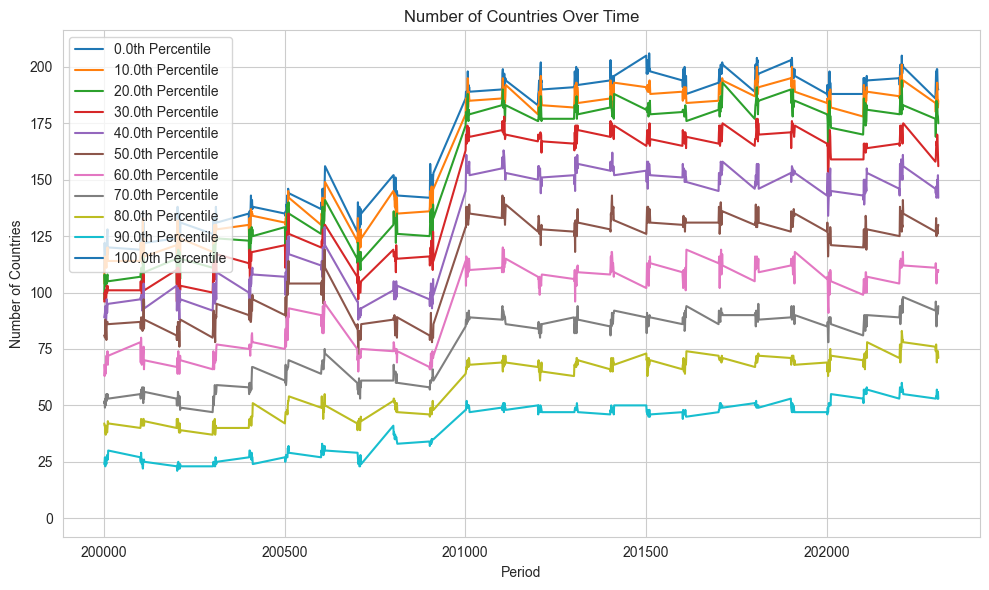

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with columns 'ReporterDesc', 'PartnerDesc', 'Period', and 'PrimaryValue'

# Define the range of percentile thresholds
percentile_range = [i / 10 for i in range(0, 11)]  # Range from 0 to 1 by 0.1 increments

plt.figure(figsize=(10, 6))

labels = []  # List to store labels

for percentile_threshold in percentile_range:
    # Calculate the percentile threshold value
    value_threshold = df['PrimaryValue'].quantile(percentile_threshold)
    
    # Filter out rows with 'PrimaryValue' below the threshold
    df_filtered = df[df['PrimaryValue'] >= value_threshold]
    
    # Concatenate unique country names from both 'ReporterDesc' and 'PartnerDesc' columns
    unique_countries = pd.concat([df_filtered['ReporterDesc'], df_filtered['PartnerDesc']]).unique()
    
    # Group by 'Period' and count the unique countries for each period
    country_counts_by_period = df_filtered.groupby('Period')[['ReporterDesc', 'PartnerDesc']].apply(lambda x: len(set(x['ReporterDesc']).union(set(x['PartnerDesc']))))
    
    # Plotting
    country_counts_by_period.plot(label=f'{percentile_threshold * 100:.1f}th Percentile')
    labels.append(f'{percentile_threshold * 100:.1f}th Percentile')  # Append label to the list

# Plotting
country_counts_by_period.plot(color='skyblue', linestyle='-')
plt.title('Number of Countries Over Time')
plt.xlabel('Period')
plt.ylabel('Number of Countries')
plt.tight_layout()
plt.legend(labels)  # Display labels
plt.show()


### Compare the removed countries with differnet level of percetile removed

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with columns 'ReporterDesc', 'PartnerDesc', 'Period', and 'PrimaryValue'

# Define the percentile thresholds
percentile_threshold_1 = 0
percentile_threshold_2 = 0.6

# Calculate the percentile threshold values
value_threshold_1 = df['PrimaryValue'].quantile(percentile_threshold_1)
value_threshold_2 = df['PrimaryValue'].quantile(percentile_threshold_2)

# Filter out rows with 'PrimaryValue' below each threshold
df_filtered_1 = df[df['PrimaryValue'] >= value_threshold_1]
df_filtered_2 = df[df['PrimaryValue'] >= value_threshold_2]

# Concatenate unique country names from both 'ReporterDesc' and 'PartnerDesc' columns for each percentile
unique_countries_1 = set(pd.concat([df_filtered_1['ReporterDesc'], df_filtered_1['PartnerDesc']]).unique())
unique_countries_2 = set(pd.concat([df_filtered_2['ReporterDesc'], df_filtered_2['PartnerDesc']]).unique())

# Find the set differences between the unique countries in each percentile
countries_removed = unique_countries_1 - unique_countries_2

# Display the results
print("Countries Removed between", percentile_threshold_1, "and", percentile_threshold_2, ":")
print(countries_removed)


Countries Removed between 0 and 0.6 :
{'Montserrat', 'Palau', 'Wallis and Futuna Isds', 'Pitcairn', 'Holy See (Vatican City State)', 'Fr. South Antarctic Terr.', 'Falkland Isds (Malvinas)', 'Lesotho', 'Antarctica', 'Saint Barthélemy', 'Guinea-Bissau', 'Burundi', 'N. Mariana Isds', 'Sao Tome and Principe', 'South Georgia and the South Sandwich Islands', 'Saint Pierre and Miquelon', 'Saint Helena', 'Marshall Isds', 'Niue'}


### Compare the diff before and after 2011 (Remove 60%)

In [36]:
percentile_threshold = 0.6

value_threshold = df['PrimaryValue'].quantile(percentile_threshold)
    
# Filter out rows with 'PrimaryValue' below the threshold
df_remove60 = df[df['PrimaryValue'] >= value_threshold]

In [37]:
# Filter the data
df_period1 = df_remove60[(df_remove60['Period'] < 201101)]
df_period2 = df_remove60[(df_remove60['Period'] <= 202309) & (df_remove60['Period'] >= 201101)]


In [38]:
df_period1

,Period,ReporterISO,ReporterDesc,PartnerISO,PartnerDesc,PrimaryValue
0,200101,NOR,Norway,FIN,Finland,1.087262e+06
1,200101,CHE,Switzerland,FIN,Finland,9.427225e+05
2,200101,FRA,France,THA,Thailand,7.555251e+06
4,200101,CHE,Switzerland,THA,Thailand,7.525743e+05
5,200101,FRA,France,IRL,Ireland,1.645797e+07
...,...,...,...,...,...,...
374753,200912,ITA,Italy,USA,USA,2.992075e+07
374755,200912,NOR,Norway,USA,USA,2.443646e+05
374756,200912,POL,Poland,USA,USA,1.046390e+05
374758,200912,ESP,Spain,USA,USA,9.908097e+05


In [43]:
# Concatenate unique country names from both 'ReporterDesc' and 'PartnerDesc' columns for each percentile
unique_countries_period1 = set(pd.concat([df_period1['ReporterDesc'], df_period1['PartnerDesc']]).unique())
unique_countries_period2 = set(pd.concat([df_period2['ReporterDesc'], df_period2['PartnerDesc']]).unique())

# Find the set differences between the unique countries in each percentile
countries_removed = unique_countries_period1 - unique_countries_period2
countries_added = unique_countries_period2 - unique_countries_period1
print("Countries Added from period1 to period2:")
print(countries_added)

# Display the results
print("Countries Removed from period1 to period2:")
print(countries_removed)

Countries Added from period1 to period2:
{'Bhutan', 'Western Sahara', 'Vanuatu', 'South Sudan', 'Saint Vincent and the Grenadines', 'Br. Indian Ocean Terr.', 'FS Micronesia', 'Anguilla', 'Cocos Isds', 'Samoa', 'Cayman Isds', 'Solomon Isds', 'Tokelau', 'Tuvalu', 'Saint Lucia', 'Fiji', 'Sint Maarten', 'Tonga', 'Nauru', 'Dominica', 'Heard Island and McDonald Islands', 'Bonaire', 'Cabo Verde', 'Kiribati', 'Curaçao', 'Timor-Leste', 'Christmas Isds', 'Guyana', 'Sudan', 'Cook Isds', 'American Samoa', 'Eritrea', 'Gambia', 'Grenada'}
Countries Removed from period1 and period2:
{'Norfolk Isds', 'Comoros', 'Serbia and Montenegro (...2005)', 'Bouvet Island'}


Remove those countries removed from period1 to period2

In [ ]:
# Save to csv
df_remove60.to_excel('../data/processed/monthly_TradeData_without_outlier.xlsx',index=False)